# Sexta Atividade de Processamento Digital de Sinais - ECAC14A #
## Mateus Alexandre M. de Souza ##
### Exercício 1 ###

Considere o sinal abaixo amostrado a uma taxa de 100Hz. Ele possui 3 componentes de
frequências, 2Hz, 4Hz e 44Hz.\
s = [ 0 0.6208 0.5125 1.6891 1.0679 2.3083 1.6396 2.3789 2.1087 2.0034 2.3083
1.4194 2.1135 0.8806 1.5275 0.5449 0.7111 0.4243 -0.0674 0.4141 -0.5449
0.3773 -0.5848 0.2336 -0.2448 -0.0000 0.2448 -0.2336 0.5848 -0.3773 0.5449
-0.4141 0.0674 -0.4243 -0.7111 -0.5449 -1.5275 -0.8806 -2.1135 -1.4194 -2.3083
-2.0034 -2.1087 -2.3789 -1.6396 -2.3083 -1.0679 -1.6891 -0.5125 -0.6208 ]\
Pede-se:\
a) Especifique um filtro (diagrama de tolerâncias e parâmetros) para atenuar a frequência de\
44Hz em 20dB. A banda de transição deve iniciar em 6Hz tolerando-se uma perda de 3dB\
nesta frequência. Qual o nome do tipo de resposta em frequência deste filtro?

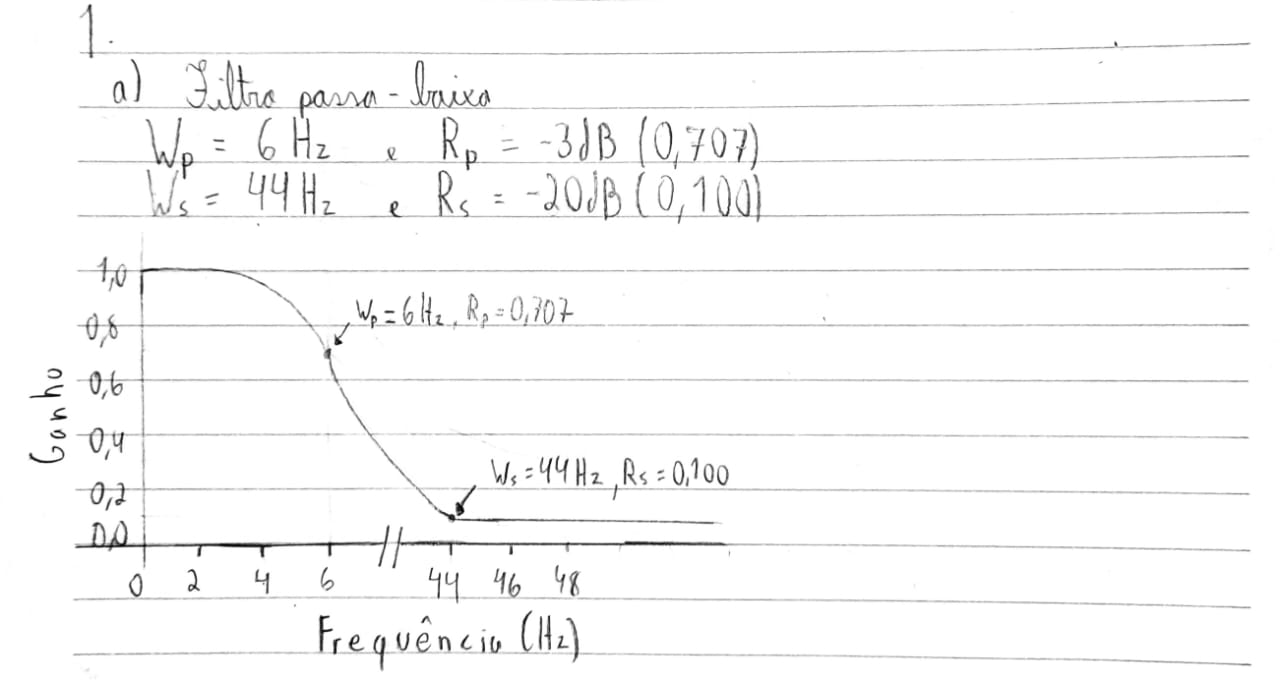

b) Tente aproximar os requisitos do filtro do item (a) com um modelo Single Pole (fornecer a
função de transferência) e verifique se sua Resposta em Frequência cumpre os requisitos.

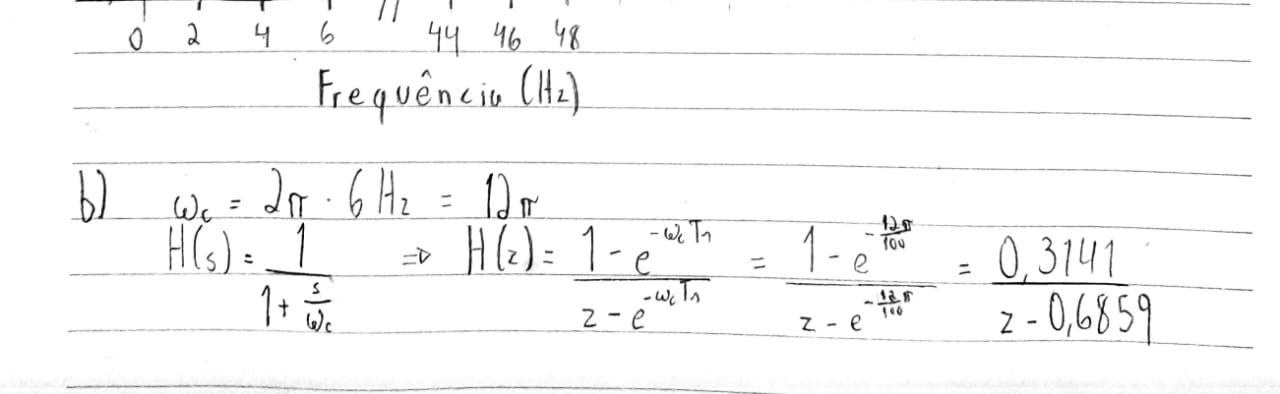

<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  0.3141
----------
z - 0.6859

dt = 0.01



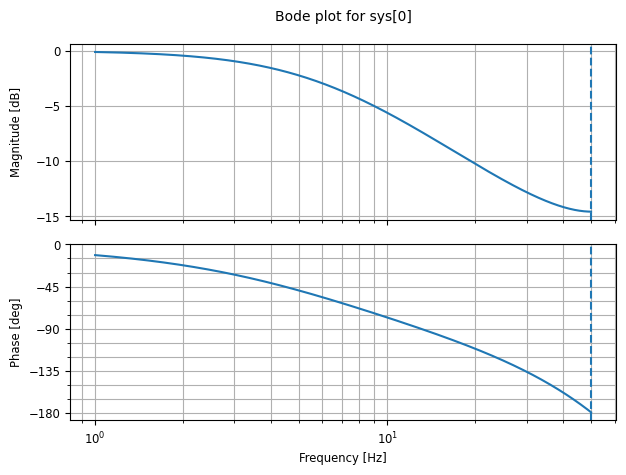

In [1]:
import numpy as np
import control as ct

num = [0.3141]
den = [1, -0.6859]

Hz = ct.tf(num, den, 1/100)
print(Hz)

frequencies = np.linspace(0, 50, 500)
omega = 2 * np.pi * frequencies

mag, phase, omega = ct.frequency_response(Hz, omega)
ct.bode(Hz,dB=True,Hz=True)

c) Escreva uma função Python para este filtro para processamento em lote (offline) e faça a
filtragem do sinal s com ela. Apresente os espectros do sinal antes e depois de filtrado.

Antes:


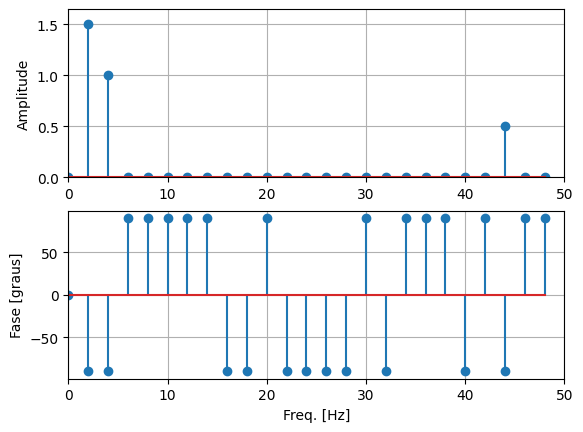

Depois:


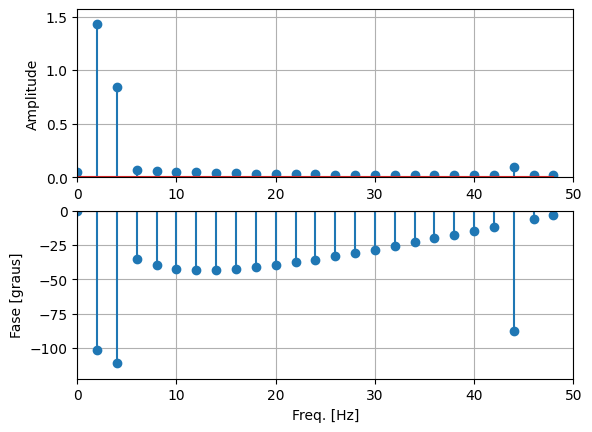

In [2]:
from espectro import espectro1D
from scipy.signal import lfilter

s = np.array([0, 0.6208, 0.5125, 1.6891, 1.0679, 2.3083, 1.6396, 2.3789, 2.1087, 2.0034, 2.3083, \
1.4194, 2.1135, 0.8806, 1.5275, 0.5449, 0.7111, 0.4243, -0.0674, 0.4141, -0.5449, \
0.3773, -0.5848, 0.2336, -0.2448, -0.0000, 0.2448, -0.2336, 0.5848, -0.3773, 0.5449, \
-0.4141, 0.0674, -0.4243, -0.7111, -0.5449, -1.5275, -0.8806, -2.1135, -1.4194, -2.3083, \
-2.0034, -2.1087, -2.3789, -1.6396, -2.3083, -1.0679, -1.6891, -0.5125, -0.6208])
print("Antes:")
espectro1D(s, 100, 1)
print("Depois:")
espectro1D(lfilter(num, den, s),100,1)

d) Escreva uma função Python para processamento de tempo real para este filtro e faça a
filtragem do sinal s com ela. Apresente os espectros do sinal antes e depois de filtrado

Antes:


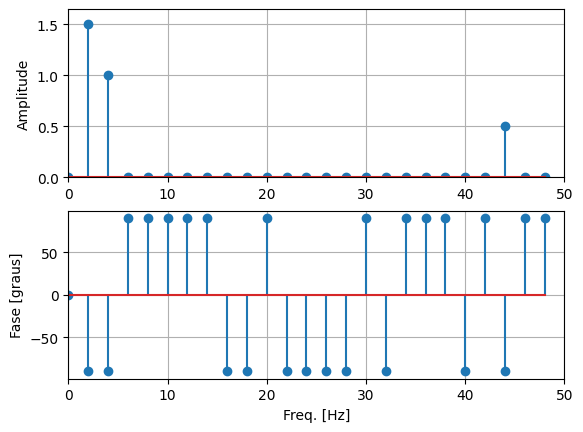

Depois:


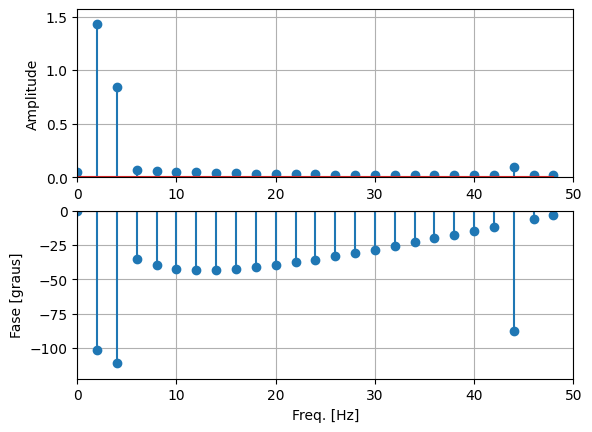

In [3]:
y_prev = 0
y = np.zeros(len(s))

for n in range(len(s)):
    y[n] = 0.3141 * s[n] + 0.6859 * y[n-1]

print("Antes:")
espectro1D(s, 100, 1)
print("Depois:")
espectro1D(y,100,1)